In [ ]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt

# import the data
df = pd.read_csv("/content/trending_videos.csv")

In [ ]:
df.head()

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,22tVWwmTie8,Eminem - Houdini [Official Music Video],Eminem - Houdini\nListen: https://eminem.lnk.t...,2024-05-31T04:00:02Z,UC20vb-R_px4CguHzzBPhoyQ,EminemVEVO,10,"['Eminem', 'Houdini', 'Hip', 'Hop', 'エミネム', '에...",PT4M57S,hd,True,14736971,1306831,0,0,105793
1,Kf86x8F9M90,College Football 25 | Gameplay Deep Dive,Bring Glory Home. Pre-order EA SPORTS College ...,2024-05-31T14:55:06Z,UCT4wAMwETXqDf-U_DVuqabA,EA SPORTS College,20,"['college football', 'college football 25', 'c...",PT4M52S,hd,False,1079642,50259,0,0,6936
2,mfz-Ztki88s,ILLEGAL builds in LEGO...,50+ secret ways to build in Lego you probably ...,2024-05-31T15:30:38Z,UCUU3GdGuQshZFRGnxAPBf_w,TD BRICKS,24,"['lego', 'lego set', 'lego sets', 'lego movie'...",PT9M7S,hd,True,1064281,24723,0,0,2690
3,VGnOpZhsPk4,ATEEZ(에이티즈) - 'WORK' Official MV,[GOLDEN HOUR : Part.1]\nRelease Date: 2024. 5....,2024-05-31T04:00:01Z,UCQdq-lqPEq_yZ_wP_kuVB9Q,KQ ENTERTAINMENT,10,"['KQ', '케이큐']",PT3M15S,hd,True,11742765,338559,0,0,28919
4,m-4ZM3jxhdE,"State of Play | May 30, 2024",State of Play is back! Tune in live for update...,2024-05-30T22:00:12Z,UC-2Y8dQb0S6DtpxNgAKoJKA,PlayStation,20,"['PlayStation', 'PS5', 'video games', 'next ge...",PT35M32S,hd,True,1672973,52456,0,0,8292


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        200 non-null    object
 1   title           200 non-null    object
 2   description     196 non-null    object
 3   published_at    200 non-null    object
 4   channel_id      200 non-null    object
 5   channel_title   200 non-null    object
 6   category_id     200 non-null    int64 
 7   tags            200 non-null    object
 8   duration        200 non-null    object
 9   definition      200 non-null    object
 10  caption         200 non-null    bool  
 11  view_count      200 non-null    int64 
 12  like_count      200 non-null    int64 
 13  dislike_count   200 non-null    int64 
 14  favorite_count  200 non-null    int64 
 15  comment_count   200 non-null    int64 
dtypes: bool(1), int64(6), object(9)
memory usage: 23.8+ KB


In [ ]:
# Check for missing values
print(df.isnull().sum())

video_id          0
title             0
description       0
published_at      0
channel_id        0
channel_title     0
category_id       0
tags              0
duration          0
definition        0
caption           0
view_count        0
like_count        0
dislike_count     0
favorite_count    0
comment_count     0
dtype: int64


In [ ]:
# Drop the missing values
df = df.dropna()

In [ ]:
# Check for duplicate rows
df.duplicated().sum()

0

In [ ]:
# Get descriptive statistics
df.describe()

,category_id,view_count,like_count,dislike_count,favorite_count,comment_count
count,196.000000,1.960000e+02,1.960000e+02,196.0,196.0,196.000000
mean,18.872449,1.754300e+06,7.213569e+04,0.0,0.0,5079.959184
std,6.568695,3.159292e+06,1.501413e+05,0.0,0.0,12495.936284
min,1.000000,5.526100e+04,1.430000e+02,0.0,0.0,0.000000
25%,17.000000,3.462905e+05,1.472700e+04,0.0,0.0,1010.000000
50%,20.000000,7.210640e+05,2.772250e+04,0.0,0.0,2032.000000
75%,24.000000,1.313123e+06,5.955500e+04,0.0,0.0,4163.000000
max,28.000000,2.232396e+07,1.306831e+06,0.0,0.0,109712.000000


In [ ]:
# prompt: find the difference between view_count and like_count and group by channel_id and find the top 5 channels that have the least difference

df['view_like_diff'] = df['view_count'] - df['like_count']
grouped_df = df.groupby('channel_id')['view_like_diff'].mean()
least_diff_channels = grouped_df.sort_values(ascending=True).head(5)
least_diff_channels = pd.merge(df[['channel_id', 'channel_title']], least_diff_channels, on='channel_id', how='right')
print(least_diff_channels)

                 channel_id    channel_title  view_like_diff
0  UCs1pApqJNPZBcPcDjEWn6MA  Nintendo Mobile         52841.0
1  UChh-akEbUM8_6ghGVnJd6cQ           BWF TV         55251.0
2  UC38Mkyko_biVZjeZ8QYMJ7A  Bargain Bethany         71724.0
3  UClVrJwcIy7saPcGc1nct80A  Fueled By Ramen         90889.0
4  UC-b1JdevG6fVeb06rRN_Xhw       40/29 News         93716.5
5  UC-b1JdevG6fVeb06rRN_Xhw       40/29 News         93716.5


In [ ]:
# prompt: find the channel_id that published the most videos

most_videos_channel = df['channel_id'].value_counts().idxmax()
print(f"Channel with the most videos: {most_videos_channel}")

Channel with the most videos: UCWJ2lWNubArHWmf3FIHbfcQ


In [ ]:
# prompt: find the range of data from published_at

import pandas as pd

# find the minimum and maximum values
min_date = df['published_at'].min()
max_date = df['published_at'].max()

print(f"Range of published dates: {min_date} to {max_date}")


Range of published dates: 2024-05-19T00:06:52Z to 2024-05-31T15:30:38Z


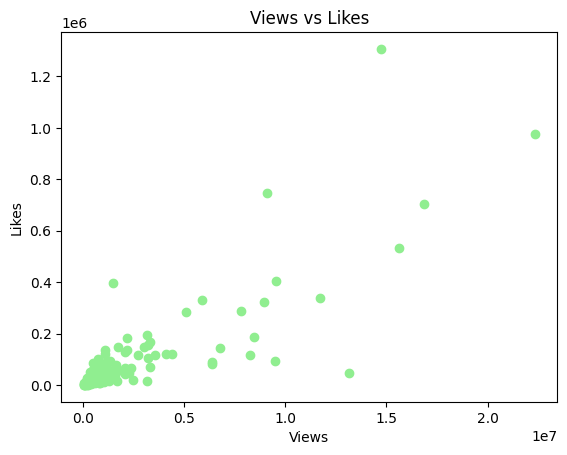

In [ ]:
# Plot the relationship between views and likes
plt.scatter(df['view_count'], df['like_count'], color='lightgreen')
plt.title('Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

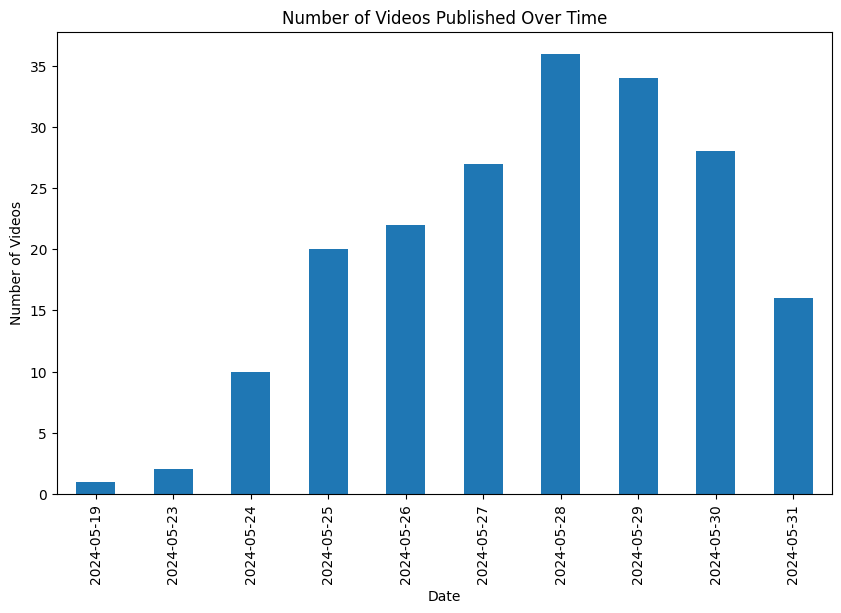

In [ ]:
# prompt: draw a plot to show the number of videos published over this period

import pandas as pd
import matplotlib.pyplot as plt
# Create a new column with the date only
df['date'] = pd.to_datetime(df['published_at']).dt.date

# Group the data by date and count the number of videos
grouped_data = df.groupby('date')['video_id'].count()

# Plot the data
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Videos Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Videos')
plt.show()

In [ ]:
# prompt: find the most used tags from the feature tags

# Convert the tags column to a list of strings
df['tags'] = df['tags'].str.strip('[]').str.strip("''").str.split("', '")

# Flatten the list of lists into a single list
all_tags = [tag for sublist in df['tags'].tolist() for tag in sublist]

# Count the occurrences of each tag
tag_counts = {}
for tag in all_tags:
  if tag not in tag_counts:
    tag_counts[tag] = 0
  tag_counts[tag] += 1

# Sort the tags by their counts
sorted_tags = sorted(tag_counts.items(), key=lambda item: item[1], reverse=True)

# Print the most used tags
print("Most used tags:")
for tag, count in sorted_tags[:10]:
  print(f"{tag}: {count}")


Most used tags:
: 32
video games: 7
minecraft: 7
challenge: 7
gaming: 6
funny: 5
comedy: 5
PS5: 4
diy: 4
commentary: 4


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49800 (\N{HANGUL SYLLABLE SYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54140 (\N{HANGUL SYLLABLE PEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48036 (\N{HANGUL SYLLABLE MYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

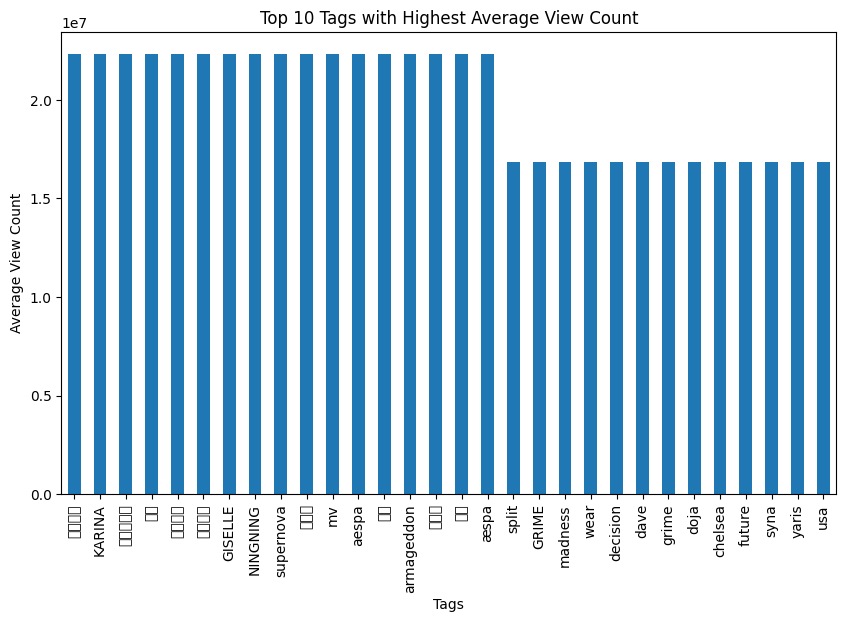

In [ ]:
# prompt: demonstrate how tags are related to view_count

import matplotlib.pyplot as plt

# Explode the tags column to get individual tag-video pairs
df_exploded = df.explode('tags')

# Group the exploded data by tags and calculate the average view count
avg_views_by_tag = df_exploded.groupby('tags')['view_count'].mean()

# Sort the tags by average view count
sorted_tags_by_views = avg_views_by_tag.sort_values(ascending=False)

# Plot the top 10 tags with the highest average view count
plt.figure(figsize=(10, 6))
sorted_tags_by_views[:20].plot(kind='bar')
plt.title('Top 10 Tags with Highest Average View Count')
plt.xlabel('Tags')
plt.ylabel('Average View Count')
plt.show()

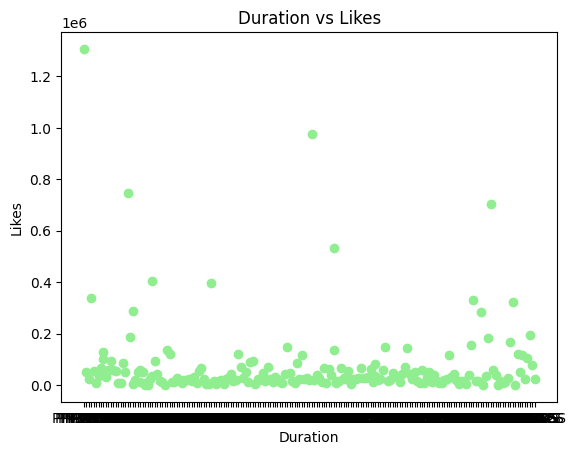

In [ ]:
# prompt: scatter plot to show how duration is related to like_count

import matplotlib.pyplot as plt
plt.scatter(df['duration'], df['like_count'], color='lightgreen')
plt.title('Duration vs Likes')
plt.xlabel('Duration')
plt.ylabel('Likes')
plt.show()


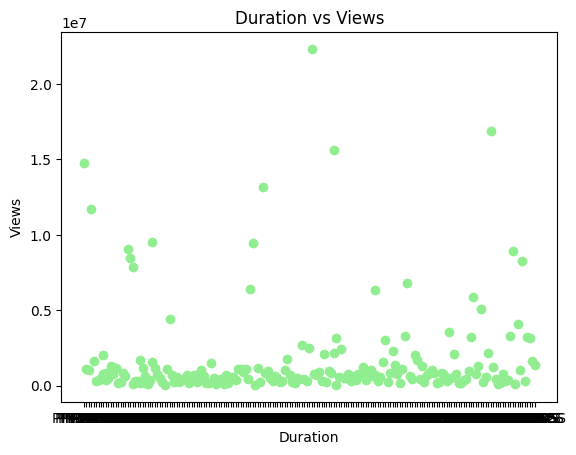

In [ ]:
# prompt: scatter plot to show how duration is related to view_count

import matplotlib.pyplot as plt
plt.scatter(df['duration'], df['view_count'], color='lightgreen')
plt.title('Duration vs Views')
plt.xlabel('Duration')
plt.ylabel('Views')
plt.show()


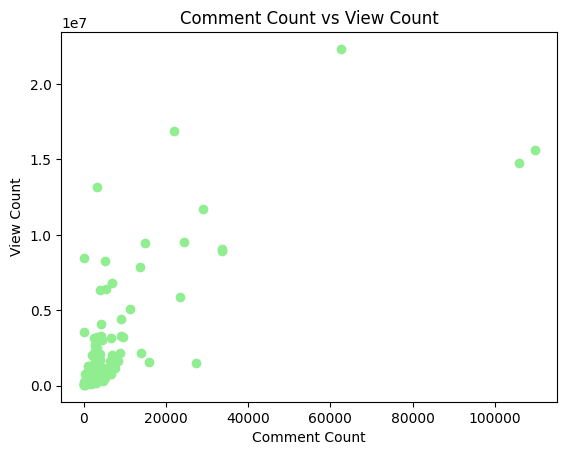

In [ ]:
# prompt: scatter plot to show how comment_count is related to view_count

import matplotlib.pyplot as plt
plt.scatter(df['comment_count'], df['view_count'], color='lightgreen')
plt.title('Comment Count vs View Count')
plt.xlabel('Comment Count')
plt.ylabel('View Count')
plt.show()
